# Short form of answers/ideas for common CS coding interview questions
___
___

# Riddles of sorts
___
___

## Egg Drop

### Problem Statement

A tower has 100 floors. You've been given two eggs. The eggs are strong enough that they can be dropped from a particular floor in the tower without breaking. You've been tasked to find the highest floor an egg can be dropped without breaking, in as few drops as possible. If an egg is dropped from above its target floor it will break. If it is dropped from that floor or below, it will be intact and you can test drop the egg again on another floor.

Show algorithmically how you would go about doing this in as few drops as possible. (Your answer should be a number of the fewest drops needed for testing 2 eggs on 100 floors)

### Solution

##### Linear Search (Simplest)

- Drop #1 from every 10th floor.
- When #1 breaks, drop #2 each of last 9 floors till #2 breaks.

Best Case: 1st floor -> 1 + 1 = 2 drops total

Worst Case: 99th floor -> 10 + 9 = 19 drops total

##### Triangle series (Optimal)

Generalize the problem to **n** floors.  If there are 1000 floors, then drops for #1 is the primary contributer.  So, need to find solution to where number of drops for #1 + #2 is constant for all cases of a given building.  

Consider:
- Drop #1 from **x**
- If #1 breaks, worst case is #2 takes **x-1**.  **total = x+(x-1)**
- Keep trying #1 from every x+(x-1).

Triangle series:

$$x + (x-1) + (x-2) + (x-3) + ... + 1$$

which equals x(x+1)/2.  Solve for x knowing total number of floors.  So,

$$x(x+1)/2 = n$$

Solve with numpy:  convert to zero on one side, then:
$$0 = 0.5x^2 +0.5x -n  $$  

In [3]:
import numpy as np
n=100
np.roots([0.5,0.5,-n])

array([-14.6509717,  13.6509717])

Positive root is 13.651.

So, first floor to try is 14.

Worst case is 14.

___
___
# Common coding Qs

### Fibonacci series

Each element of the Fibonacci series is the sum of the two proceeding elements. The simplest is the series 1, 1, 2, 3, 4, 5, etc.

## Write a function that computes the Nth fibonacci number

In [11]:
#Brute force, looping. (Simplest)
def fib(n):
    
    a,b = 1,1
    for i in range(n-1):
        a,b = b,a+b
    return a

print "brute force: ",fib(7)

# Using recursion (slowest)
def fibR(n):
    if n==1 or n==2:
        return 1
    return fib(n-1)+fib(n-2)

print "recursion: ",fibR(7)

## Using memoization (Fastest).  Memoize the simple loop/brute force func.
def memoize(fn, arg):
    memo = {}
    if arg not in memo:
        memo[arg] = fn(arg)
    return memo[arg]
fibm = memoize(fib,7)
print "memoization: ",fibm

brute force:  13
recursion:  13
memoization:  13


___

## Stock Prices

### Problem

Given a list of stock prices, where the index is the time stamp, find the greatest profit that can be made by a single purchase and sale.

For example, if you were given the list of stock prices:

prices = [12,11,15,3,10]

Then your function would return the maximum possible profit, which would be 7 (buying at 3 and selling at 10).

### Solution.  

#### Brute Force.  O(N^2) time, O(1) space.

Loop over every element and find max value after it, keeping track of max profit.

#### Greedy Algorith.  O(N) time, O(1) space.

Go through list, tracking:
    - min price so far
    - max profit so far (ie. max(current_price-min, max_profit) )
    
Corner cases:
- less than 2 prices in list
- prices keep going down.

Fixes:
- set initial min price to 0th
- set initial max price to 1st - 0th

___
## Integer list to product list

### Problem

Given a list of integers, write a function that will return a list, in which for each index the element will be the product of all the integers except for the element at that index

For example, an input of [1,2,3,4] would return [24,12,8,6] by performing [2×3×4,1×3×4,1×2×4,1×2×3] 

**Note: You can not use division in your answer! **

### Solution
#### Brute Force. O(N^2) time, O(N) space.

- loop over elements.
    - loop over all other elements to find their product and push into a master list
    
#### Two passes of Greedy Algorithm.  O(2N) time, O(N) space.

* Pass through array once and load up another array with products before. 
    - track product of previous elements, don't re-calc each time
* Pass through backwards and load up array with products before x products after
    - track product of elements after (before, but backwards)

___
## Make a queue from two stacks

#### Queue: FIFO

#### Stack: LIFO

### Solution.  Worst case O(N), but over many runs the amortised time is O(k).

- Both stacks start empty
- (enqueue) When new item comes in, push (Python list append) onto stack #1
- (dequeue) When popping off an item:
    - If stack #2 is empty, pop items from #1 onto #2 one-by-one
        - pop top of #2 to get front most item
    - Else, just pop #2 to get front most item

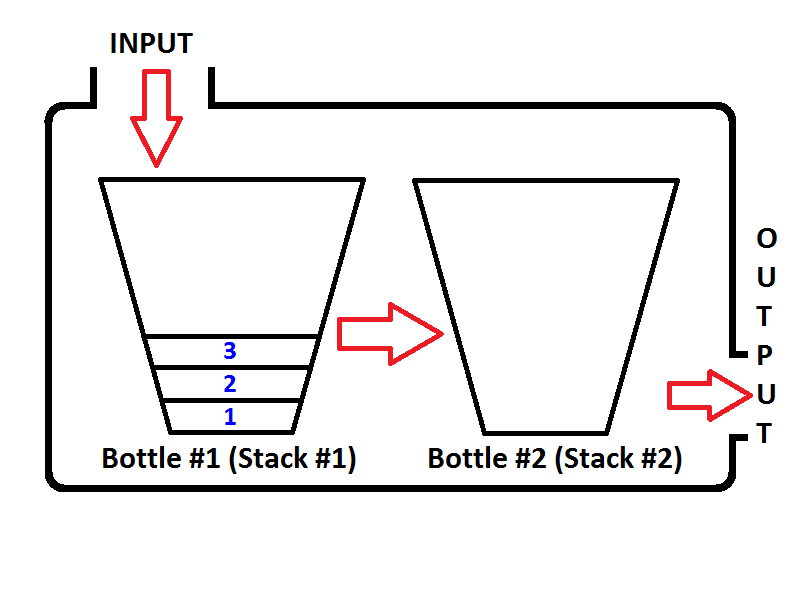

In [16]:
from IPython.display import Image
Image(filename='twoStacks-oneQue.png', width=300)

___
___

# Linked lists, Pros/Cons

## Pros

* Linked Lists have constant-time insertions and deletions in any position, in comparison, arrays require O(n) time to do the same thing.

* Linked lists can continue to expand without having to specify their size ahead of time (remember our lectures on Array sizing form the Array Sequence section of the course!)

## Cons

* To access an element in a linked list, you need to take O(k) time to go from the head of the list to the kth element. In contrast, arrays have constant time operations to access elements in an array.
___
___

## Signly linked list cycle check

### Problem

Given a singly linked list, write a function which takes in the first node in a singly linked list and returns a boolean indicating if the linked list contains a "cycle".

### Solution
#### Use sets.  Simple. O(N) space and time.

- Run through each node.
- Track each node 'next' pointer seen in a set
- If current node's next has been seen, return True.

#### Using two racing markers.  O(N) time, O(k) space.
Two markers race, one twice as fast.  If they are ever equal, then there is a cycle.

- marker 1 = next
- marker 2 = next.next
- if marker 2 == marker 1, return True

___

## Reverse a Doubly linked list

Run through once and switch 'previous' and 'next' pointers.

For each node:
- next_temp = current
- current  = previous_temp
- previous_temp = current
- current_temp = next_temp

Now, end of list is front.

___

## OO Q: design an elevator system

First there is an elevator class. It has a direction (up, down, stand, maintenance), a current floor and a list of floor requests sorted in the direction. It receives request from this elevator.

Then there is a bank. It contains the elevators and receives the requests from the floors. These are scheduled to all active elevators (not in maintenance).

The scheduling will be like:
- if available pick a standing elevator for this floor.
- else pick an elevator moving to this floor.
- else pick a standing elevator on an other floor.
- else pick the elevator with the lowest load.

Each elevator has a set of states.

- Maintenance: the elevator does not react to external signals (only to its own signals).
- Stand: the elevator is fixed on a floor. If it receives a call. And the elevator is on that floor, the doors open. If it is on another floor, it moves in that direction.
- Up: the elevator moves up. Each time it reaches a floor, it checks if it needs to stop. If so it stops and opens the doors. It waits for a certain amount of time and closes the door (unless someting is moving through them. Then it removes the floor from the request list and checks if there is another request. If so the elevator starts moving again. If not it enters the state stand.
- Down: like up but in reverse direction.

There are additional signals:

- alarm. The elevator stops. And if it is on a floor, the doors open, the request list is cleared, the requests moved back to the bank.
- door open. Opens the doors if an elevator is on a floor and not moving.
- door closes. Closed the door if they are open. 

EDIT: Some elevators don't start at bottom/first_floor esp. in case of skyscrapers.

min_floor & max_floor are two additional attributes for Elevator.

___
## Find a number which exists an odd number of times in a list

### Using Hashing. O(N) time and space

- make a dict
- loop through list
    - if value not a key in dict,add it as the key (and set value to 1)
    - if value IS a key in dict, delete it from dict

### Using XOR. O(N) time, O(k) space.

bitwise XOR is ^ in Python and many other languages.
It returns binary 0 if elements are same, and it returns element when element ^ 0.

- initialize res = 0
- loop through elements
    - res = res ^ element
- return res 

___
## Sorted linked list -> BST
[soln](http://www.geeksforgeeks.org/sorted-linked-list-to-balanced-bst/)
### Simple. O(N log(N))

- 1) Get the Middle of the linked list and make it root.
- 2) Recursively do same for left half and right half.
    - a) Get the middle of left half and make it left child of the root created in step 1.
    - b) Get the middle of right half and make it right child of the root created in step 1.

___
## Fastest sorting algorithms:

- $O(n^2)$ sorting algorithms, such as insertion sort, bubble sort, and selection sort, which you should typically use only in special circumstances; 
- Quicksort, which is worst-case $O(n^2)$ but quite often $O(nlogn)$ with good constants and properties and which can be used as a general-purpose sorting procedure; 
- $O(nlogn)$ algorithms, like merge-sort and heap-sort, which are also good general-purpose sorting algorithms
- $O(n)$, or linear, sorting algorithms for lists of integers, such as radix, bucket and counting sorts, which may be suitable depending on the nature of the integers in your lists.


### Overall

General-purpose, not integers: Merge sort, or heap sort.

For a list of integers: Radix or bucket sort